In [49]:
import pandas as pd

import pickle
from sklearn.metrics import *
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

## Closed set binary

Train on train set

Grid search on dev set

Evaluation on eval set

In [50]:
result_root_path = '/nas/home/cborrelli/bot_speech/results/closed_set_binary'


In [52]:
nfft_list = [512, 256, 128]
hop_size_list = [256, 128, 64]
selected_features = ['lpc', 'bicoh', 'unet']
#selected_features = ['bicoh']
number_lpc_order = 49
stop_lpc_order = 50
normalizers_keys = ["minmax", "zscore", "l2"]
classifiers_keys = ["svm", "rf"]


In [53]:
results_df = pd.DataFrame(columns=['nfft', 'hop_size', 'selected_features', 'number_lpc_order', 'stop_lpc_order', 
                                   'normalization', 'classifier', 
                                   'accuracy_train', 'accuracy_dev','accuracy_eval',
                                   'cm_train','cm_dev','cm_eval',
                                   'model_params' ])

for fft_params in zip(nfft_list, hop_size_list):
    nfft = fft_params[0]
    hop_size = fft_params[1]
    for c in classifiers_keys:
        for n in normalizers_keys:
            result_name = "class_{}_norm_{}_nfft_{}_hop-size_{}_numberlpcorder_{}_stoplpcorder_{}".format(
                    c, n, nfft, hop_size,
                    number_lpc_order,
                    stop_lpc_order)

            result_name = result_name + "_selected_features_" + "-".join(
                s for s in selected_features) + ".npy"

            result_filename = os.path.join(result_root_path, result_name)

            if os.path.exists(result_filename):
                result_dict = pickle.load(open(result_filename, "rb" ))
                cm_train = confusion_matrix(result_dict['y_train'], result_dict['y_predict_train'],
                                           normalize='true')
                cm_dev = confusion_matrix(result_dict['y_dev'], result_dict['y_predict_dev'],
                                         normalize='true')
                cm_eval = confusion_matrix(result_dict['y_eval'], result_dict['y_predict_eval'],
                                          normalize='true')

                acc_train = balanced_accuracy_score(result_dict['y_train'], result_dict['y_predict_train'])
                acc_dev = balanced_accuracy_score(result_dict['y_dev'], result_dict['y_predict_dev'])
                acc_eval = balanced_accuracy_score(result_dict['y_eval'], result_dict['y_predict_eval'])


                results_df.loc[len(results_df.index)] = [nfft, hop_size, selected_features, 
                                                       number_lpc_order, stop_lpc_order,
                                                       n, c, 
                                                       acc_train, acc_dev, acc_eval,
                                                       cm_train, cm_dev, cm_eval, result_dict['best_model']]
                        


In [54]:
len(results_df)

18

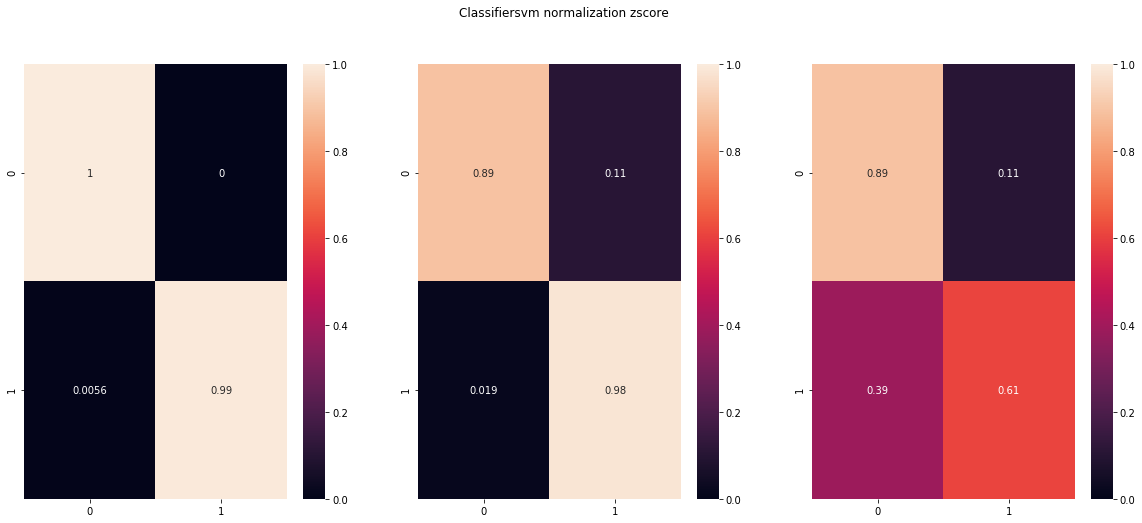

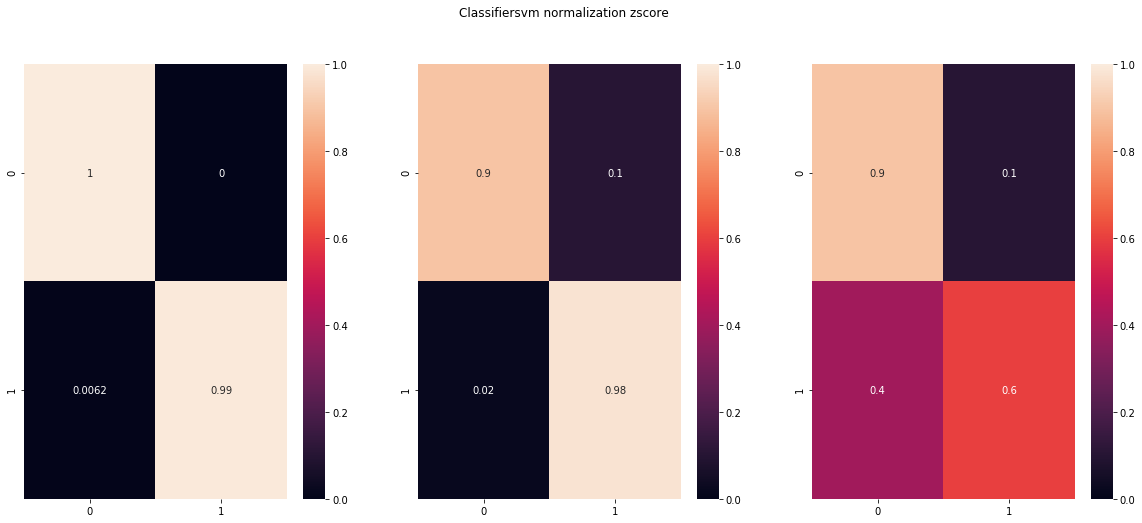

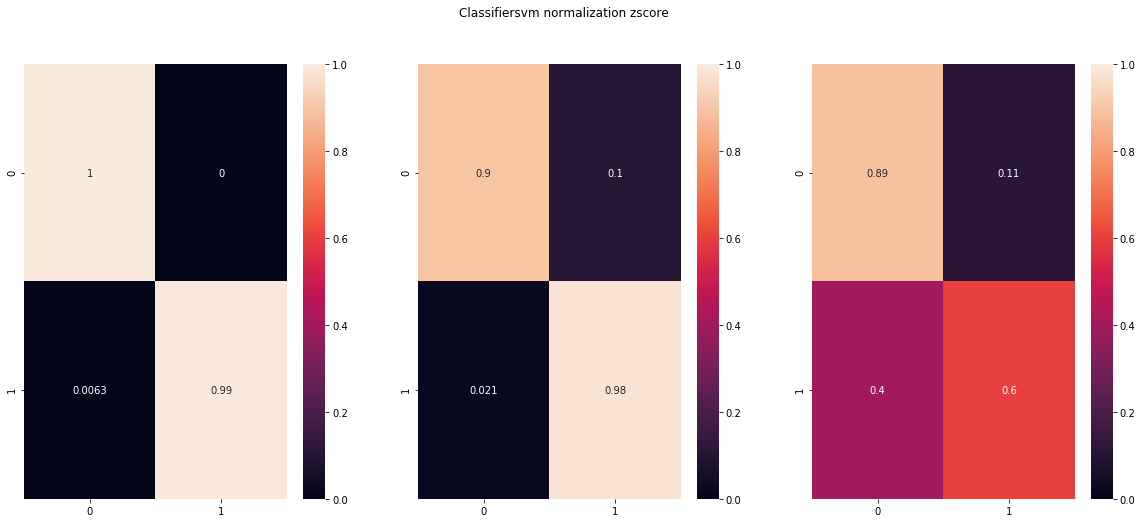

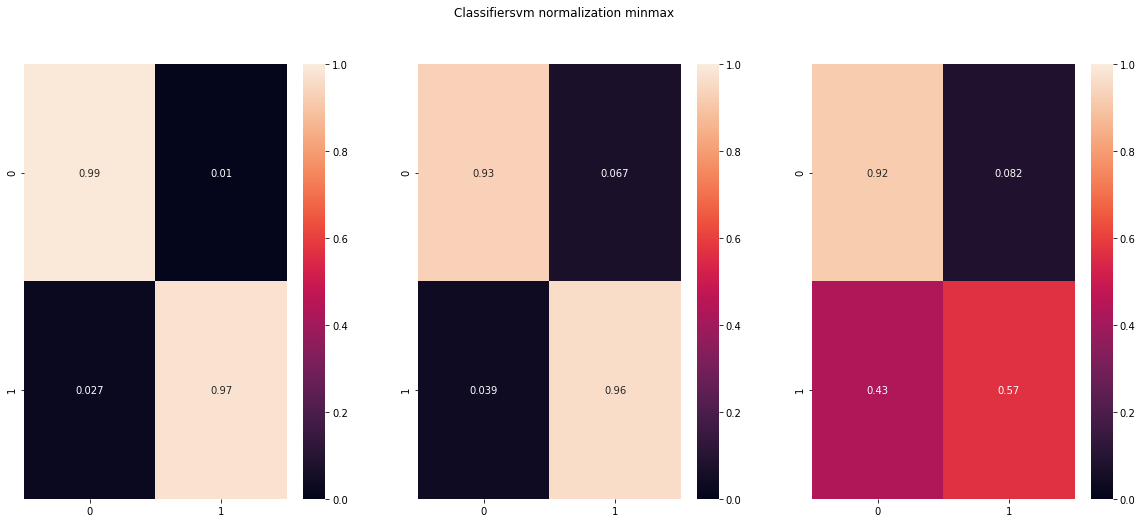

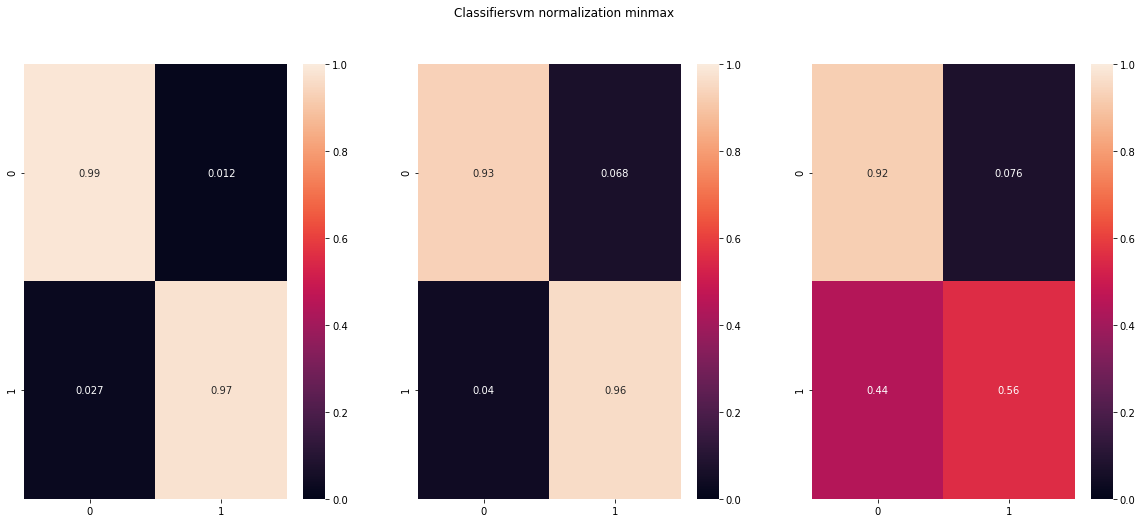

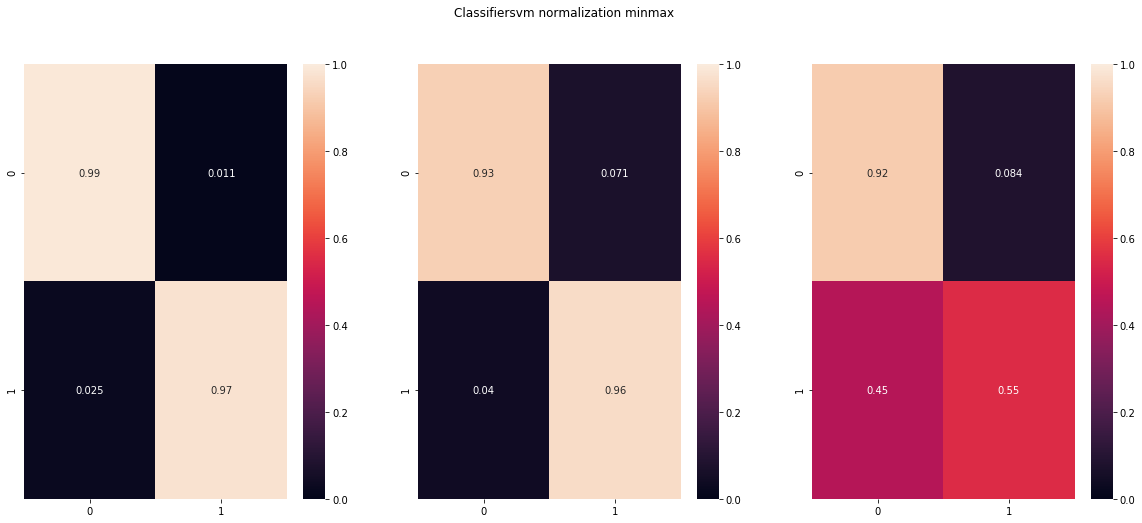

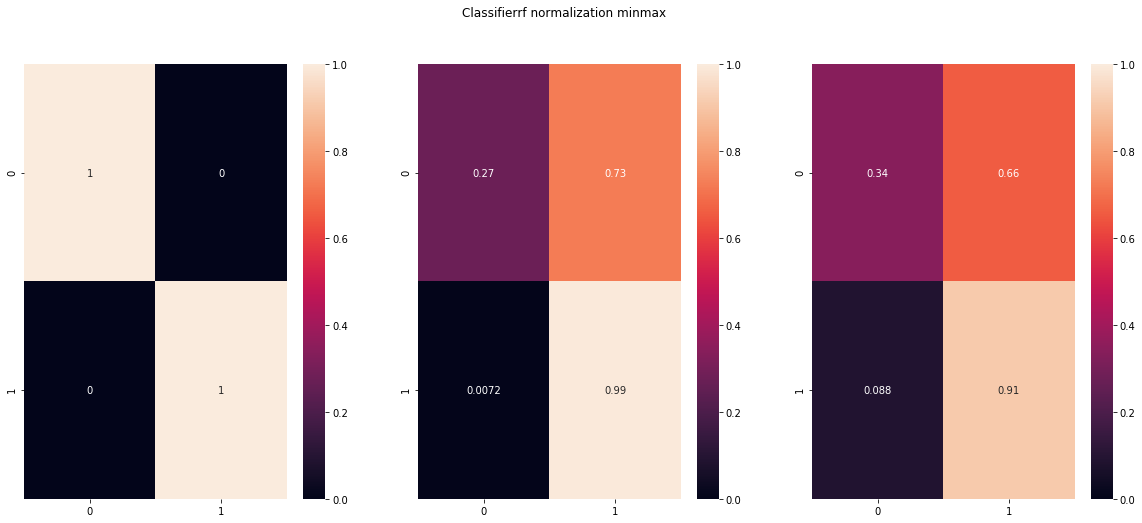

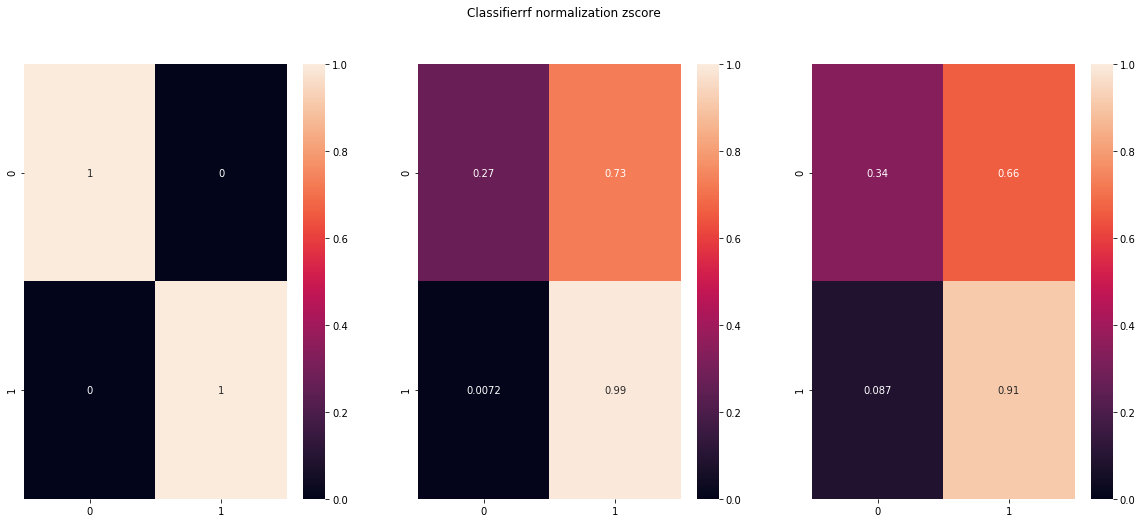

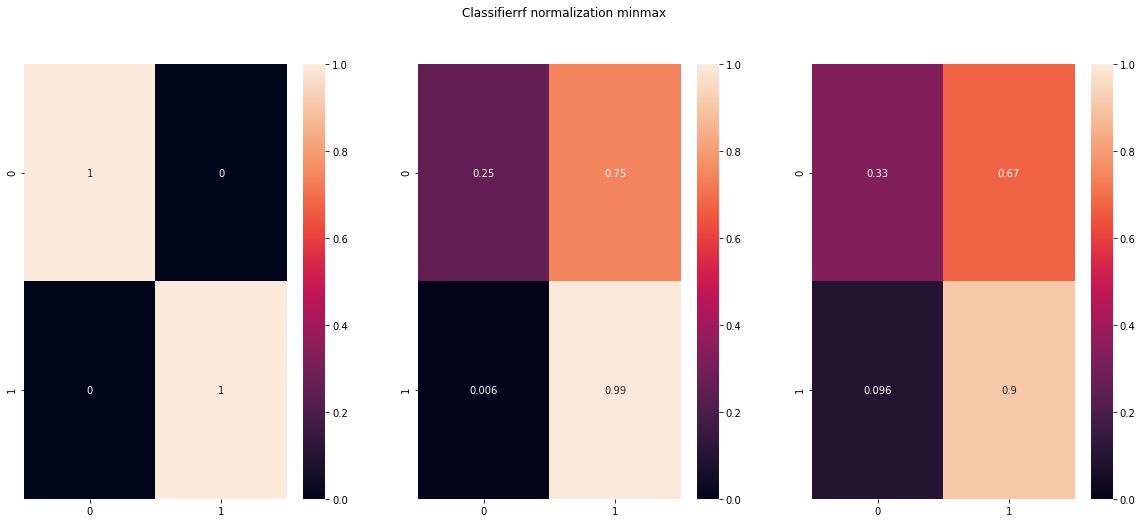

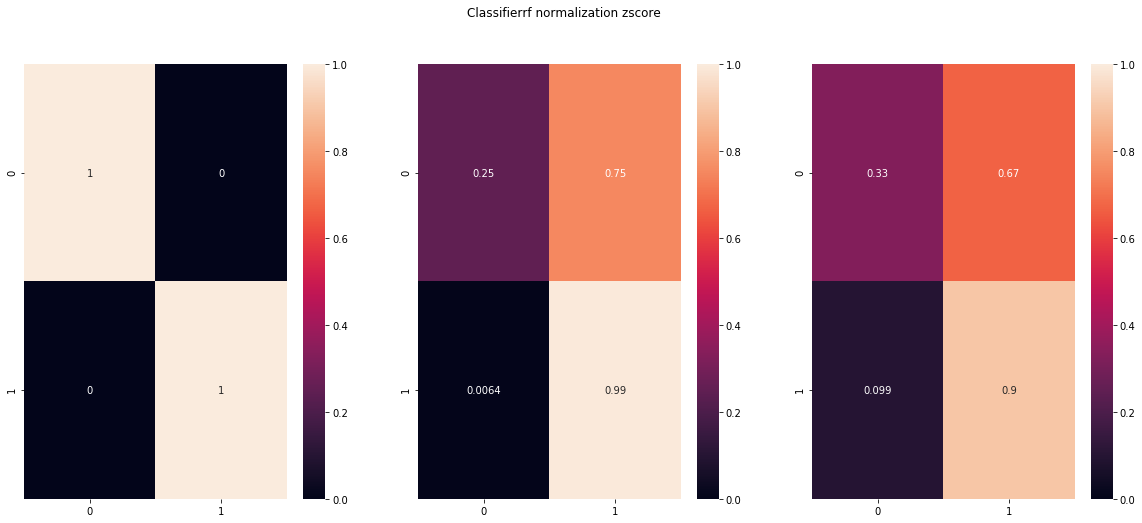

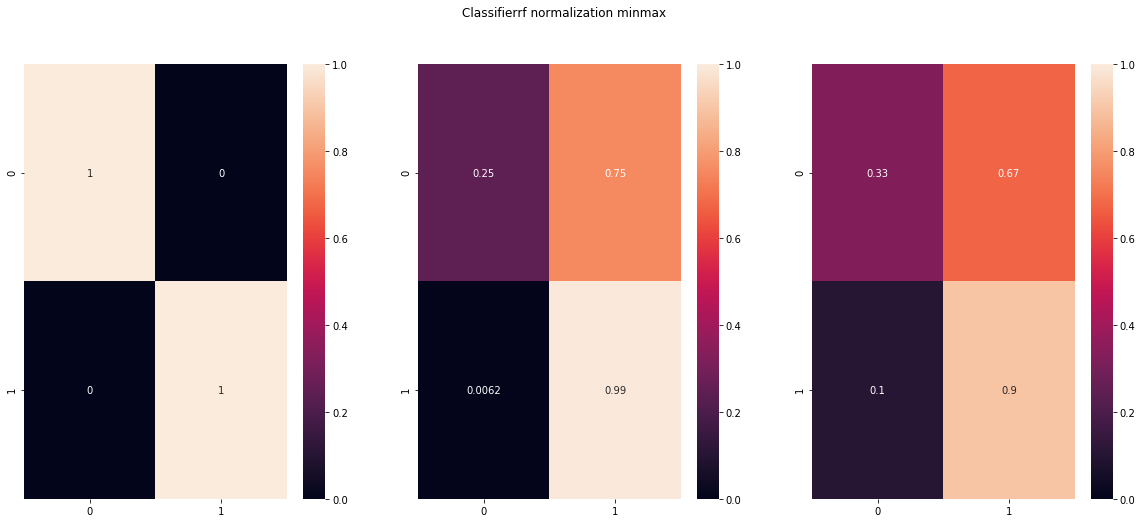

In [57]:
results_df.sort_values('accuracy_eval', ascending=False, inplace=True)
results_df.reset_index(inplace=True, drop=True)
for index, row in results_df.iterrows():
    if index > 10:
        break
        
    plt.figure(figsize = (20,8))
    plt.suptitle("Classifier{} normalization {}".format(row['classifier'], row['normalization']))

    plt.subplot(131)
    sns.heatmap(row['cm_train'], annot=True, vmin=0, vmax=1)
    
    plt.subplot(132)
    sns.heatmap(row['cm_dev'], annot=True, vmin=0, vmax=1)
    
    plt.subplot(133)
    sns.heatmap(row['cm_eval'], annot=True, vmin=0, vmax=1)
    
    plt.show()

In [38]:
results_df.sort_values('accuracy_eval', ascending=False, inplace=True)

for index, row in results_df.iterrows():
    #if row['classifier'] == 'svm':
    if True:
        print("Classifier {} normalization {}".format(row['classifier'], row['normalization']))
        print("Acc train {} Acc dev {} Acc eval {}".format(row['accuracy_train'],
                                                           row['accuracy_dev'],
                                                           row['accuracy_eval']))

Classifier svm normalization zscore
Acc train 0.997220703480955 Acc dev 0.937066602360888 Acc eval 0.7529721836376859
Classifier svm normalization zscore
Acc train 0.9969245489338436 Acc dev 0.938340815220445 Acc eval 0.7484624693493959
Classifier svm normalization zscore
Acc train 0.996856205576818 Acc dev 0.9386323636646601 Acc eval 0.7442276831861904
Classifier svm normalization minmax
Acc train 0.9813963121439613 Acc dev 0.9470025881208843 Acc eval 0.7437124473756171
Classifier svm normalization minmax
Acc train 0.9805629285076011 Acc dev 0.9459354085950166 Acc eval 0.7411156561670817
Classifier svm normalization minmax
Acc train 0.9818192918405015 Acc dev 0.9448117203466468 Acc eval 0.7349503045152547
Classifier rf normalization minmax
Acc train 1.0 Acc dev 0.6337642563455036 Acc eval 0.6264423813716445
Classifier rf normalization zscore
Acc train 1.0 Acc dev 0.6314887081452554 Acc eval 0.6252021634593714
Classifier rf normalization minmax
Acc train 1.0 Acc dev 0.624031958711738 A

In [ ]:
results_df